In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema 
from scipy.interpolate import interp1d 
import operator as op
from decimal import *
# import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [3]:
# codingscheme = filepath_down = "../data_tables/hs_rs_downlink" 
hsrs_up = "../data_tables/hs_rs_uplink"
shannon_scheme = "../data_tables/shannon_tables"
poly_scheme = "../data_tables/polyanskiy_up"
protocolbit = 4*10**4
target = 10**(-9)
dSNR = 0.01
paddratio = 0.1 # padd = 10**(-10) 
tSNR_range = np.arange(0, 92, 1) 
rSNR1_range = np.arange(-1, 7, 0.01)
start_nodes, end_nodes = 2, 36
user_range = xrange(start_nodes, end_nodes)

In [56]:
%%time
%run ../cow.py

endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-4)

paddratio = 0.1
N = 30
filename = hsrs_up + '/n' + str(N) + '.in'
codetable = load_table(filename)
tablefunc = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
rSNR = codetable[0][np.where(np.array(codetable[1])<=paddratio*target)[0][0]]
padd = codetable[1][np.where(np.array(codetable[0]==rSNR))[0][0]]
   
# print rSNR
    
tSNR_range = np.arange(0, 14, 0.01)
integral = []
threshold = []
# result = np.zeros((len(tSNR_range),))

for tSNR in tSNR_range:
    integral.append(p_single_integral(tablefunc, tSNR, dfade, endpoint))
    hcrit = 10**((rSNR - tSNR)/10) # linear fade
    pbadfade = 1 - np.exp(-hcrit)
    psingle_lt = pbadfade + (1-pbadfade)*padd
    threshold.append(psingle_lt)
    
# print "\n"
# print integral
# print "\n"
# print threshold

<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:164: RuntimeWarning: divide by zero encountered in log10
<string>:169: RuntimeWarning: divide by zero encountered in log10


CPU times: user 4min 38s, sys: 44 s, total: 5min 22s
Wall time: 3min 1s


<string>:118: RuntimeWarning: invalid value encountered in true_divide
<string>:119: RuntimeWarning: invalid value encountered in greater


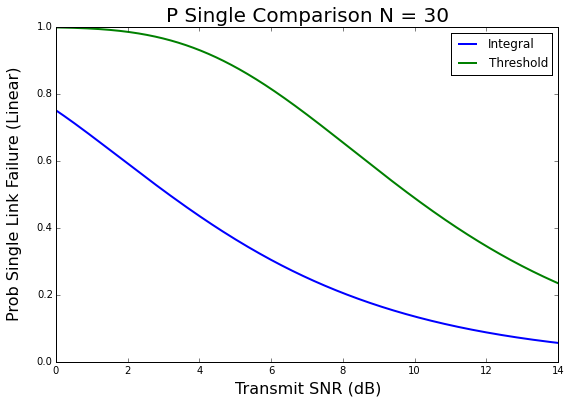

In [57]:
figure(figsize=(9, 6))
plot(tSNR_range, integral, lw=2.0, label='Integral')
plot(tSNR_range, threshold, lw=2.0, label='Threshold')
legend(loc=0)
title('P Single Comparison N = 30',fontsize=20)
xlabel('Transmit SNR (dB)', fontsize=16)
ylabel('Prob Single Link Failure (Linear)', fontsize=16,labelpad=15)
savefig('psingle_comparison.pdf',bbox='tight')

In [51]:
%%time
%run ../cow.py

endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-4)

N = 30
filename = hsrs_up + '/n' + str(N) + '.in'
codetable = load_table(filename)
tablefunc = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

testbed = []
for paddratio in np.power(10, np.arange(6.9, 8.4, 0.01)):
    rSNR = codetable[0][np.where(np.array(codetable[1])<=paddratio*target)[0][0]]
    padd = codetable[1][np.where(np.array(codetable[0]==rSNR))[0][0]]
#     print rSNR, padd
    testbed.append((rSNR, padd))
    
tSNR_range = np.arange(0, 14, 0.01)
integral_2 = []
threshold_2 = []
threshold_2_info = []
# result = np.zeros((len(tSNR_range),))

for tSNR in tSNR_range:
    integral_2.append(p_single_integral(tablefunc, tSNR, dfade, endpoint))
    psingle_lts = []
    for (rSNR, padd) in testbed:
        hcrit = 10**((rSNR - tSNR)/10) # linear fade
        pbadfade = 1 - np.exp(-hcrit)
        psingle_lt = pbadfade + (1-pbadfade)*padd
        psingle_lts.append(psingle_lt)
    x = min(psingle_lts)
    threshold_2.append(x)
    idx = psingle_lts.index(x)
    threshold_2_info.append(testbed[idx])
    
threshold_2_info = np.array(threshold_2_info)

<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:164: RuntimeWarning: divide by zero encountered in log10
<string>:169: RuntimeWarning: divide by zero encountered in log10


CPU times: user 4min 29s, sys: 40.1 s, total: 5min 9s
Wall time: 2min 39s


<string>:118: RuntimeWarning: invalid value encountered in true_divide
<string>:119: RuntimeWarning: invalid value encountered in greater


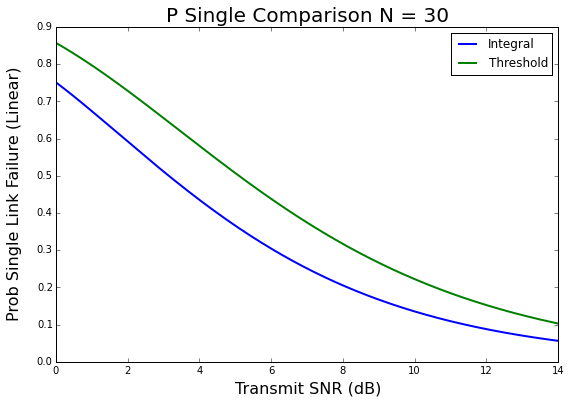

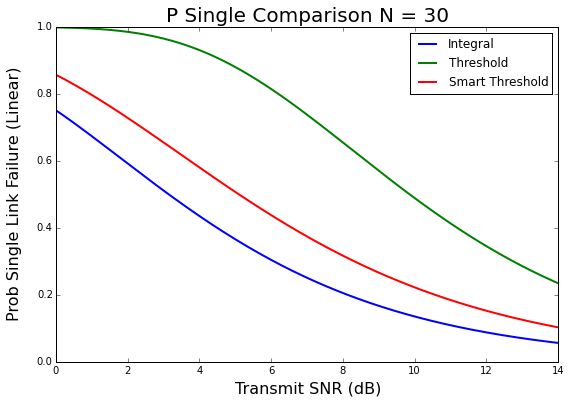

In [59]:
figure(figsize=(9, 6))
plot(tSNR_range, integral_2, lw=2.0, label='Integral')
plot(tSNR_range, threshold_2, lw=2.0, label='Threshold')
legend(loc=0)
title('P Single Comparison N = 30',fontsize=20)
xlabel('Transmit SNR (dB)', fontsize=16)
ylabel('Prob Single Link Failure (Linear)', fontsize=16,labelpad=15)
savefig('psingle_comparison_2.pdf',bbox='tight')

figure(figsize=(9, 6))
plot(tSNR_range, integral, lw=2.0, label='Integral')
plot(tSNR_range, threshold, lw=2.0, label='Threshold')
plot(tSNR_range, threshold_2, lw=2.0, label='Smart Threshold')
legend(loc=0)
title('P Single Comparison N = 30',fontsize=20)
xlabel('Transmit SNR (dB)', fontsize=16)
ylabel('Prob Single Link Failure (Linear)', fontsize=16,labelpad=15)
savefig('psingle_comparison_all.pdf',bbox='tight')

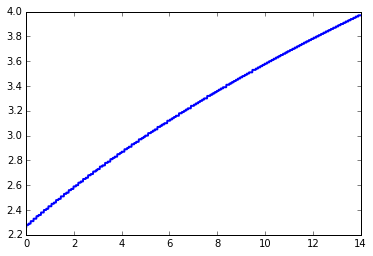

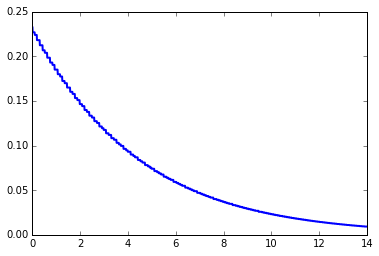

In [54]:
# threshold_2_rSNR = [x for (x,y) in threshold_2_info]
plot(tSNR_range, threshold_2_info[:,0], lw=2.0)
savefig('psingle_threshold_rSNR.pdf',bbox='tight')

figure()
plot(tSNR_range, threshold_2_info[:,1], lw=2.0)
savefig('psingle_threshold_padd.pdf',bbox='tight')

In [58]:
print threshold

[0.99878655096175506, 0.99876766692122643, 0.99874853345051018, 0.99872914794272771, 0.99870950777305756, 0.9986896102987225, 0.99866945285897613, 0.99864903277509154, 0.99862834735035044, 0.99860739387003439, 0.99858616960141711, 0.99856467179375774, 0.99854289767829574, 0.99852084446824729, 0.99849850935880202, 0.99847588952712263, 0.99845298213234446, 0.99842978431557727, 0.99840629319990792, 0.99838250589040456, 0.99835841947412207, 0.99833403102010931, 0.99830933757941687, 0.99828433618510748, 0.99825902385226628, 0.9982333975780141, 0.99820745434152069, 0.99818119110402059, 0.99815460480882923, 0.99812769238136123, 0.99810045072915077, 0.99807287674187128, 0.99804496729135872, 0.99801671923163515, 0.99798812939893411, 0.99795919461172755, 0.99792991167075396, 0.99790027735904774, 0.9978702884419709, 0.99783994166724521, 0.99780923376498643, 0.99777816144774023, 0.99774672141051879, 0.99771491033083948, 0.99768272486876497, 0.99765016166694431, 0.99761721735065678, 0.9975838885278

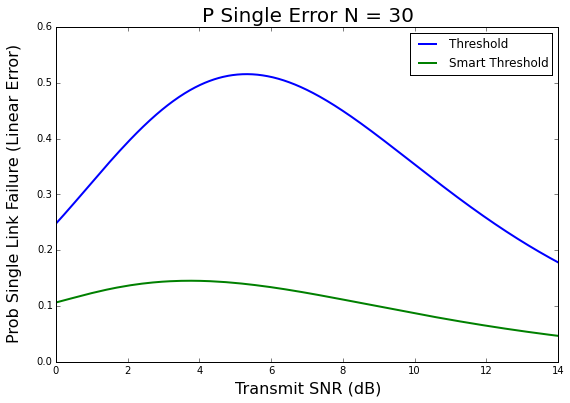

In [60]:
integral = np.array(integral)
threshold = np.array(threshold)
threshold_2 = np.array(threshold_2)

figure(figsize=(9, 6))
plot(tSNR_range, threshold-integral, lw=2.0, label='Threshold')
plot(tSNR_range, threshold_2-integral, lw=2.0, label='Smart Threshold')
legend(loc=0)
title('P Single Error N = 30',fontsize=20)
xlabel('Transmit SNR (dB)', fontsize=16)
ylabel('Prob Single Link Failure (Linear Error)', fontsize=16,labelpad=15)
savefig('psingle_comparison_error.pdf',bbox='tight')